### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head(-1)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Faqueiro,utilidades domesticas,53.95,0.000000,30/12/2022,Lucas Oliveira,SP,5,cartao_credito,1,-22.19,-48.79
2354,Celular Plus X42,eletronicos,1712.54,88.772042,15/11/2021,Thiago Silva,RJ,1,boleto,1,-22.25,-42.66
2355,Impressora,eletronicos,377.02,20.363958,18/03/2023,Lucas Oliveira,SP,5,boleto,1,-22.19,-48.79
2356,Jogo de tabuleiro,brinquedos,163.82,9.611337,06/07/2021,Lucas Oliveira,PR,5,cartao_credito,4,-24.89,-51.55


In [2]:
# Enumerando as lojas
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# 1. Análise do faturamento


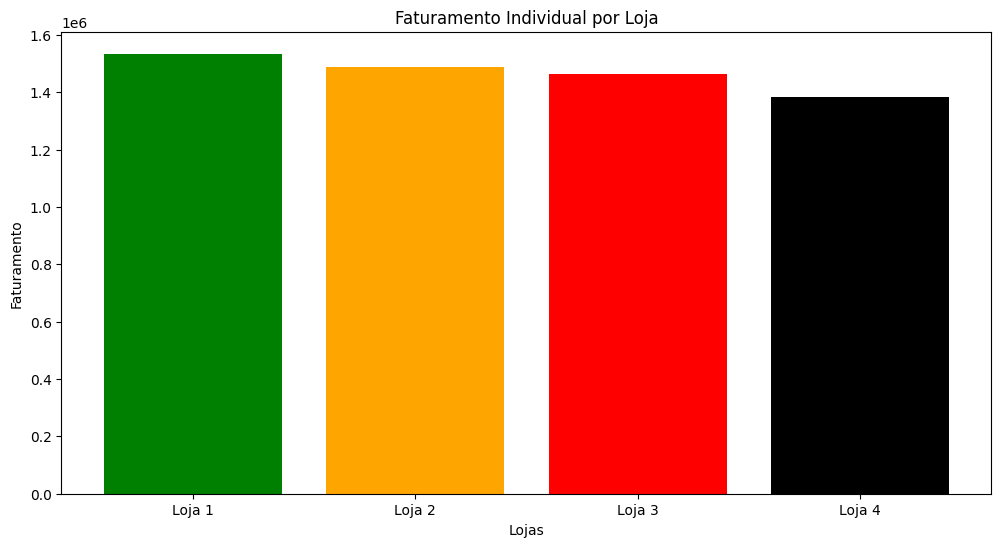

In [9]:
import matplotlib.pyplot as plt

# Definindo as listas
lojas = [loja1, loja2, loja3, loja4]  
faturamentos_lista = []

# Calcular o faturamento total de cada loja presente na lista 
faturamentos_dict_loop = {}
for i, loja in enumerate(lojas):
    faturamentos_dict_loop[f'Loja {i+1}'] = loja['Preço'].sum() 

# Extrair os nomes das lojas e os faturamentos do dicionário
nomes_lojas = list(faturamentos_dict_loop.keys())
faturamentos = list(faturamentos_dict_loop.values())

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(nomes_lojas, faturamentos, color=['green','orange','red','black']) 
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento Individual por Loja')

# Mostrar o gráfico
plt.show()


# 2. Vendas por Categoria


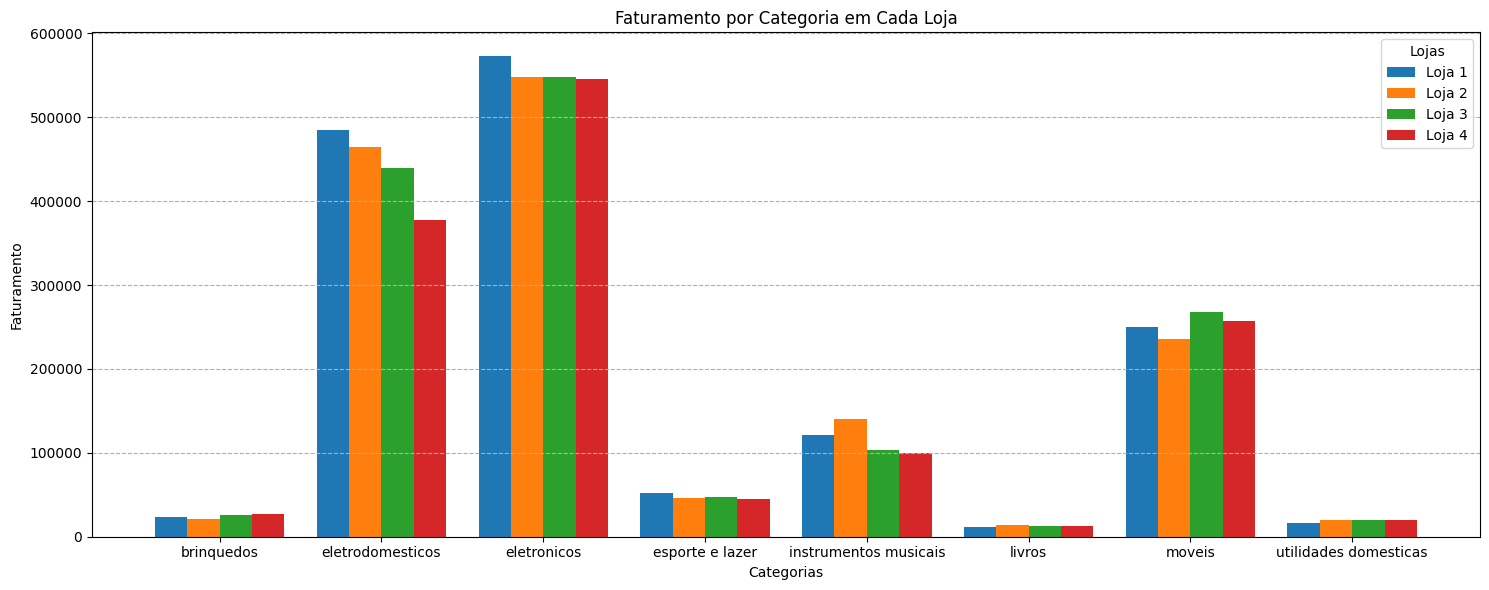

In [5]:
import numpy as np

# Agrupando os dados de cada loja por categoria e fazendo o calculo da soma do preço

vendas_por_categoria_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

# Organizar os dados de forma que possamos plotar as vendas de cada categoria lado a lado para as diferentes lojas
df_vendas_por_categoria = pd.DataFrame({
    'Loja 1': vendas_por_categoria_loja1,
    'Loja 2': vendas_por_categoria_loja2,
    'Loja 3': vendas_por_categoria_loja3,
    'Loja 4': vendas_por_categoria_loja4
})

# Preenchendo os valores NaN (se alguma loja não tiver uma categoria) com 0
df_vendas_por_categoria = df_vendas_por_categoria.fillna(0)

# Criando o gráfico barras agrupado
categorias = df_vendas_por_categoria.index
n_categorias = len(categorias)
nomes_lojas = df_vendas_por_categoria.columns
n_lojas = len(nomes_lojas)

# Define a largura das barras
largura_barra = 0.8 / n_lojas  

# Define as posições das barras no eixo x
posicoes = np.arange(n_categorias)

# Criar o gráfico
plt.figure(figsize=(15, 6))

for i, nome_loja in enumerate(nomes_lojas):
    plt.bar(posicoes + i * largura_barra, df_vendas_por_categoria[nome_loja],
            width=largura_barra, label=nome_loja)

# Adicionar rótulos, título e legenda
plt.xlabel('Categorias')
plt.ylabel('Faturamento')
plt.title('Faturamento por Categoria em Cada Loja')
plt.xticks(posicoes + (n_lojas * largura_barra / 2) - (largura_barra / 2), categorias)
plt.legend(title='Lojas')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# 3. Média de Avaliação das Lojas

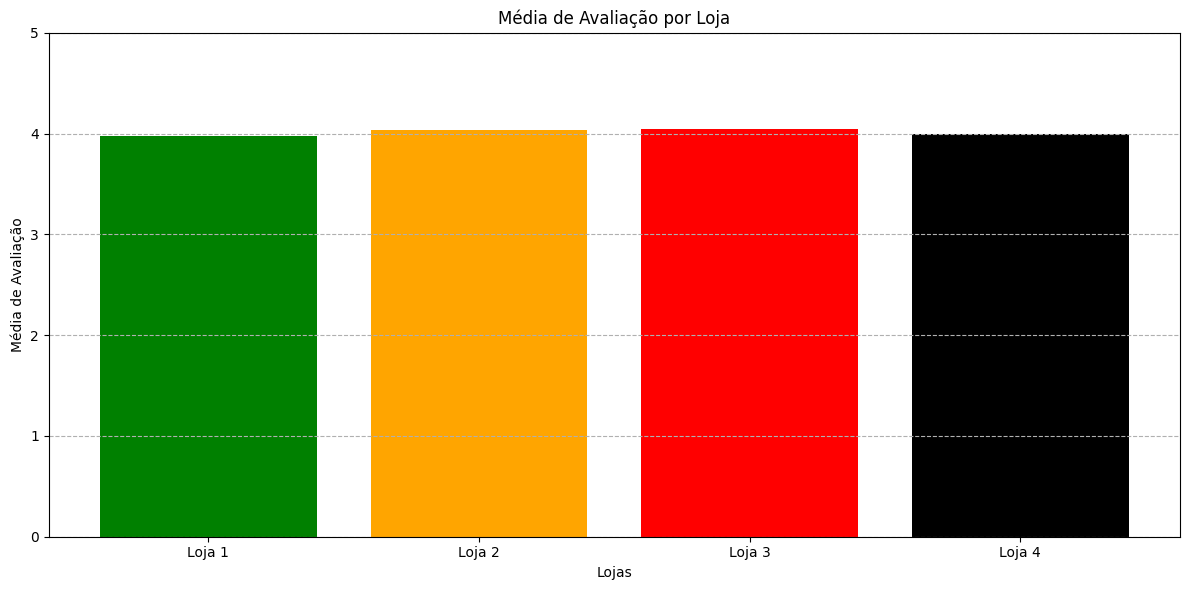

In [8]:
# Cria uma lista contendo os DataFrames das suas lojas.
lojas = [loja1, loja2, loja3, loja4]

#Inicializa um dicionário vazio para armazenar as médias de avaliação de cada loja.
medias_avaliacoes_dict = {}

#Itera sobre a lista de DataFrames, obtendo o índice (i) e o DataFrame da loja (loja) em cada iteração.
for i, loja in enumerate(lojas):
    # Verifica se a coluna chamada 'Avaliação' existe no DataFrame da loja atual e em seguida calcula a média
    if 'Avaliação da compra' in loja.columns:  
        media_avaliacao = loja['Avaliação da compra'].mean()
        medias_avaliacoes_dict[f'Loja {i+1}'] = media_avaliacao
    else:
        print(f"A coluna 'Avaliação da compra' não foi encontrada no DataFrame da Loja {i+1}.")
        medias_avaliacoes_dict[f'Loja {i+1}'] = None

# Exibindo gráfico com essas médias de avaliação
nomes_lojas_avaliacao = list(medias_avaliacoes_dict.keys())
medias_avaliacoes = list(medias_avaliacoes_dict.values())

# Remover lojas com avaliação None para o gráfico 
nomes_lojas_filtrado = [nome for i, nome in enumerate(nomes_lojas_avaliacao) if medias_avaliacoes[i] is not None]
medias_filtrado = [media for media in medias_avaliacoes if media is not None]

plt.figure(figsize=(12, 6))
plt.bar(nomes_lojas_filtrado, medias_filtrado, color=['green','orange','red','black'])
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
# Ajuste os limites do eixo y conforme a escala das suas avaliações
plt.ylim(0, 5) 
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
